<a href="https://colab.research.google.com/github/luanapuka/Projeto_Jupyter/blob/main/Cadastrando%20alunos%20-projeto%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analisando uma "escola de programação": 
Cadastrando alunos, cursos, id e email.


In [288]:
import pandas as pd

In [289]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [290]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [291]:
frames = [nomes_f, nomes_m]
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

##Juntando as duas listas de nomes

In [292]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
194,CLARA
36,DEBORA
116,MARCELA
27,LUANA
91,CELIA


# Incluindo ID aos alunos

In [293]:
import numpy as np
np.random.seed(123)

In [294]:
total_alunos = len(nomes)
total_alunos

400

In [295]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


##Incluindo email aos alunos

In [296]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [297]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


## Criando a tabela cursos 

In [298]:
!pip3 install html5lib
!pip3 install lxml

In [299]:
import html5lib
import lxml


In [300]:
cursos = pd.read_html('http://tabela-cursos.herokuapp.com/index.html')


In [301]:
cursos = cursos[0]

In [302]:
type(cursos)

pandas.core.frame.DataFrame

In [303]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


## Alterando o index dos cursos

In [304]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [305]:
cursos['id'] = cursos.index + 1
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [306]:
cursos = cursos.set_index('id')
cursos.head(2)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web


## Matriculando os alunos 

In [307]:
nomes.sample(5)


,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


In [308]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)* 1.5).astype(int)

In [309]:
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
7       9
6       9
8       2
9       1
10      1
Name: matriculas, dtype: int64

## Criando gráfico

In [310]:
import seaborn as sns
import matplotlib.pyplot as plt

In [311]:
%matplotlib inline
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Nº de matriculas por alunos')

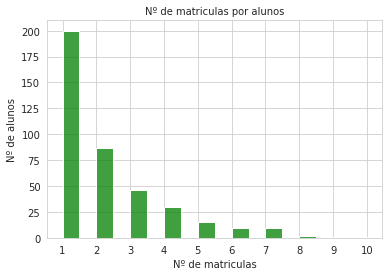

In [327]:
sns.histplot(nomes.matriculas, color='green', bins = 18)
plt.ylabel('Nº de alunos', fontsize=10)
plt.xlabel('Nº de matriculas', fontsize=10)
plt.xticks(range(1, 11))
plt.title('Nº de matriculas por alunos', fontsize=10)


In [313]:
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
7       9
6       9
8       2
9       1
10      1
Name: matriculas, dtype: int64